In [2]:
!ls -l /home/dsc/Downloads/krakenEUR.csv.gz

-rw-rw-r-- 1 dsc dsc 176774615 ene 11 17:00 /home/dsc/Downloads/krakenEUR.csv.gz


In [3]:
! zcat /home/dsc/Downloads/krakenEUR.csv.gz | head -5

1389173189,624.010000000000,0.200000000000
1389173198,624.010000000000,0.097670000000
1389173198,623.538360000000,0.013579760000
1389173265,623.538360000000,0.148960240000
1389173339,623.540660000000,0.200000000000

gzip: stdout: Broken pipe


In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('/home/dsc/Downloads/krakenEUR.csv.gz',
                   header=None,
                   names=['ts', 'price', 'volume'],
                   index_col='ts')

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
data.head()

,price,volume
ts,,
1389173189,624.01000,0.20000
1389173198,624.01000,0.09767
1389173198,623.53836,0.01358
1389173265,623.53836,0.14896
1389173339,623.54066,0.20000


In [7]:
data.describe()

,price,volume
count,2.522749e+07,2.522749e+07
mean,4.603733e+03,4.201418e-01
std,3.477302e+03,1.541445e+00
min,1.481712e+02,0.000000e+00
25%,1.404612e+03,1.288000e-02
50%,3.906900e+03,5.949156e-02
75%,6.889300e+03,2.585900e-01
max,2.000000e+04,4.400000e+02


In [8]:
data.shape

(25227493, 2)

In [9]:
data.index[0]

1389173189

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([ 496423.,  396660.,  532964.,  819786., 1019842., 1166304.,
        4222232., 5591652., 7246191., 3735439.]),
 array([1.38917319e+09, 1.40497649e+09, 1.42077978e+09, 1.43658308e+09,
        1.45238638e+09, 1.46818967e+09, 1.48399297e+09, 1.49979627e+09,
        1.51559956e+09, 1.53140286e+09, 1.54720616e+09]),
 <a list of 10 Patch objects>)

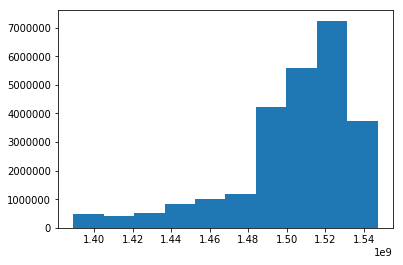

In [11]:
plt.hist(data.index)

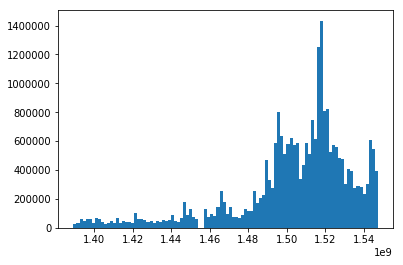

In [ ]:
_ = plt.hist(data.index, bins=100)

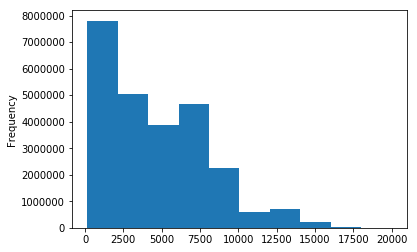

In [ ]:
data['price'].plot(kind='hist')

In [ ]:
_ = plt.scatter(data['price'], data['volume'])

In [8]:
sa = data.sample(100000)

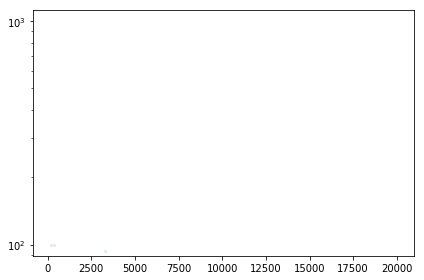

In [13]:
fig, ax = plt.subplots(1, 1)
_ = ax.scatter(sa['price'], sa['volume'], alpha=.1, s=5)
plt.yscale('log')
plt.tight_layout()

In [14]:
data.index[0]

1389173189

In [15]:
data.iloc[0]

price     624.01
volume      0.20
Name: 1389173189, dtype: float64

In [17]:
data.index.min(), data.index.max()

(1389173189, 1547206159)

In [18]:
pd.to_datetime(data.index[0])

Timestamp('1970-01-01 00:00:01.389173189')

In [19]:
pd.to_datetime(data.index[0], unit='s')

Timestamp('2014-01-08 09:26:29')

In [20]:
pd.to_datetime(data.index[-1], unit='s')

Timestamp('2019-01-11 11:29:19')

In [7]:
last_data = data.iloc[-1000000:]

In [8]:
last_data.shape

(1000000, 2)

In [9]:
last_data.index = pd.to_datetime(last_data.index, unit='s')

In [10]:
last_data.head()

,price,volume
ts,,
2018-12-03 15:33:11,3396.7,1.130000
2018-12-03 15:33:11,3396.7,0.981000
2018-12-03 15:33:11,3397.0,0.800000
2018-12-03 15:33:11,3397.2,0.029000
2018-12-03 15:33:11,3397.9,0.131179


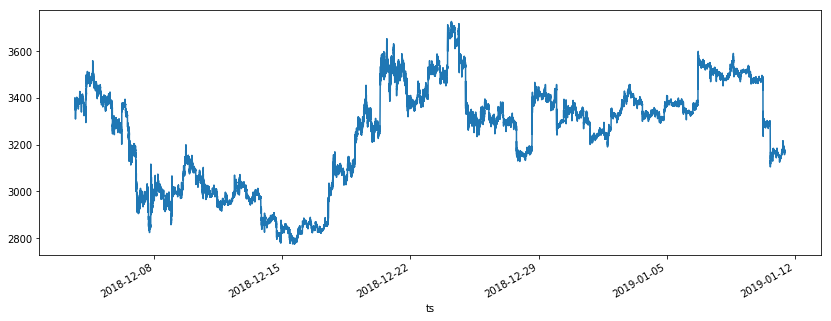

In [11]:
last_data['price'].plot(figsize=(14, 5))

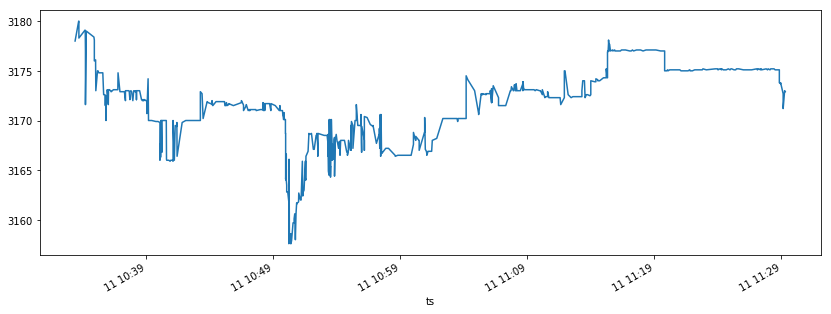

In [12]:
last_data.iloc[-1000:]['price'].plot(figsize=(14, 5))

In [13]:
last_data.index.hour

Int64Index([15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='ts', length=1000000)

In [14]:
last_data['hour'] = last_data.index.hour

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
last_data.head()

,price,volume,hour
ts,,,
2018-12-03 15:33:11,3396.7,1.130000,15
2018-12-03 15:33:11,3396.7,0.981000,15
2018-12-03 15:33:11,3397.0,0.800000,15
2018-12-03 15:33:11,3397.2,0.029000,15
2018-12-03 15:33:11,3397.9,0.131179,15


In [16]:
last_data.groupby('hour').count()

,price,volume
hour,,
0,37841,37841
1,23316,23316
2,20153,20153
3,15844,15844
4,13454,13454
5,21714,21714
6,27029,27029
7,27739,27739
8,42822,42822


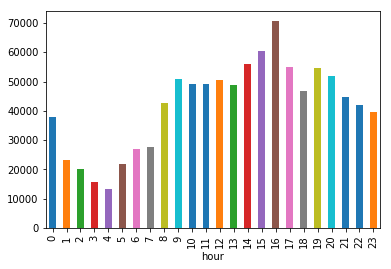

In [17]:
last_data.groupby('hour').count()['price'].plot(kind='bar')

In [18]:
mdata = last_data.resample('1h').agg(
    {'price': ['first', max, min, 'last'],
     'volume': sum})

In [19]:
mdata.head()

price                              volume
                      first     max     min    last         sum
ts                                                             
2018-12-03 15:00:00  3396.7  3400.1  3354.7  3387.8  411.870300
2018-12-03 16:00:00  3387.8  3397.4  3310.2  3375.9  651.082013
2018-12-03 17:00:00  3375.8  3397.2  3362.1  3384.2  432.904973
2018-12-03 18:00:00  3387.7  3403.7  3370.7  3391.0  833.789759
2018-12-03 19:00:00  3389.3  3393.8  3370.0  3373.3  342.018550

In [20]:
mdata.columns = mdata.columns.droplevel(0)

In [21]:
mdata.head()

,first,max,min,last,sum
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


In [22]:
mdata.rename(columns={'first': 'open', 'max': 'high', 'min': 'low', 'last': 'close', 'sum': 'volume'}, inplace=True)

In [23]:
mdata.head()

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


In [24]:
mdata.groupby(mdata.index.hour).mean()

,open,high,low,close,volume
ts,,,,,
0,3248.758974,3274.682051,3224.705128,3250.905128,297.456204
1,3250.823077,3268.284615,3234.500000,3249.312821,194.914123
2,3249.653846,3260.200000,3229.705128,3244.207692,157.600120
3,3243.979487,3255.820513,3230.679487,3243.515385,125.364057
4,3243.710256,3254.974359,3231.989744,3243.028205,98.022833
5,3243.325641,3257.725641,3226.817949,3245.202564,175.511323
6,3245.135897,3261.648718,3224.920513,3244.266667,204.069566
7,3243.912821,3256.876923,3231.069231,3245.174359,201.249441
8,3245.305128,3265.964103,3231.315385,3249.525641,342.745869


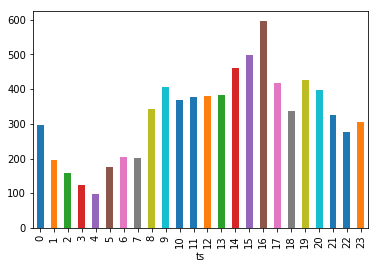

In [25]:
mdata.groupby(mdata.index.hour).mean()['volume'].plot(kind='bar')

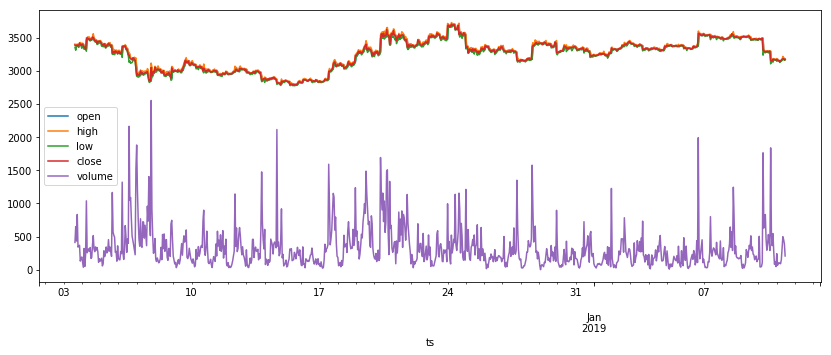

In [26]:
mdata.plot(figsize=(14, 5))

In [27]:
mdata.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25227493 entries, 1389173189 to 1547206159
Data columns (total 2 columns):
price     float64
volume    float64
dtypes: float64(2)
memory usage: 577.4 MB


In [29]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 933 entries, 2018-12-03 15:00:00 to 2019-01-11 11:00:00
Freq: H
Data columns (total 5 columns):
open      933 non-null float64
high      933 non-null float64
low       933 non-null float64
close     933 non-null float64
volume    933 non-null float64
dtypes: float64(5)
memory usage: 43.7 KB


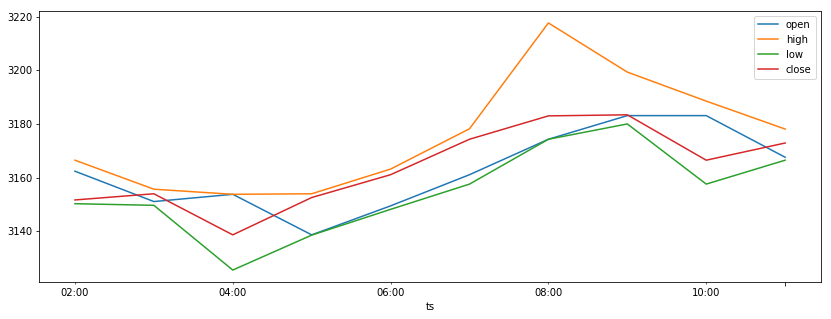

In [30]:
mdata[-10:].drop('volume', axis=1).plot(figsize=(14, 5))

In [31]:
!pip install mpl_finance

In [32]:
from mpl_finance import candlestick2_ohlc

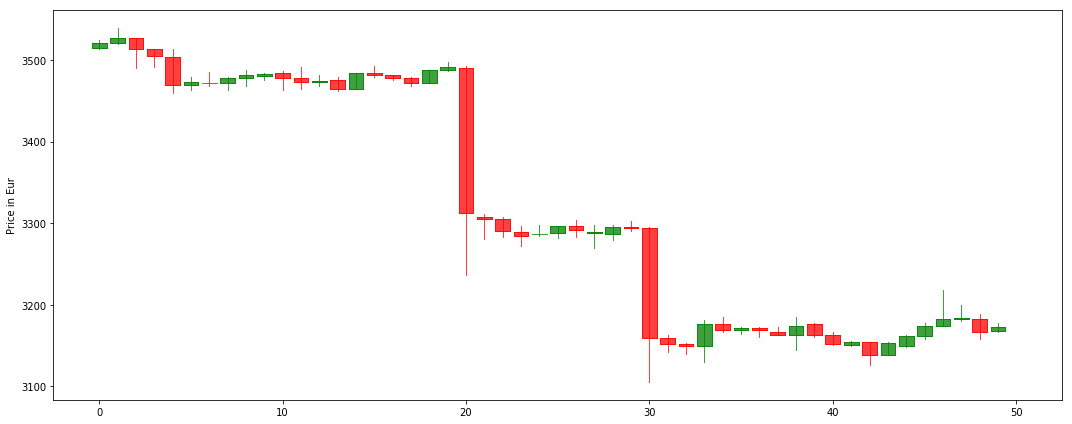

In [33]:
aux = mdata[-50:]
fig, ax = plt.subplots(1, 1, figsize=(15,6))
candlestick2_ohlc(ax, aux['open'], aux['high'], aux['low'], aux['close'],
                 colorup='g', width=.8)
ax.set_ylabel('Price in Eur')
plt.tight_layout()

In [34]:
X = np.arange(0, 1, .005)
y = 2 * X + np.random.normal(.2, X)

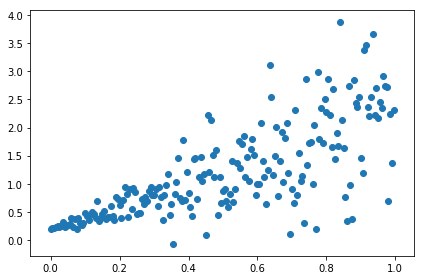

In [35]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
plt.tight_layout()

In [36]:
df = pd.DataFrame({'y':y})

In [45]:
df['moving avg'] = df.rolling(window=10).mean()

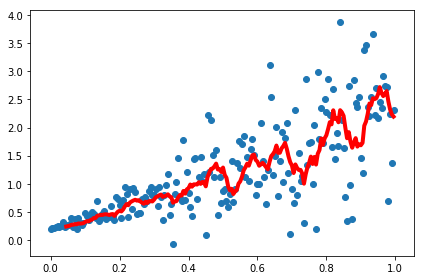

In [47]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X, df['moving avg'], c='r', lw=4)
plt.tight_layout()

In [49]:
# media movil
for i in [2, 5, 10, 20, 50, 100]:
    df['moving_avg_{}'.format(i)] = df['y'].rolling(window=i).mean()

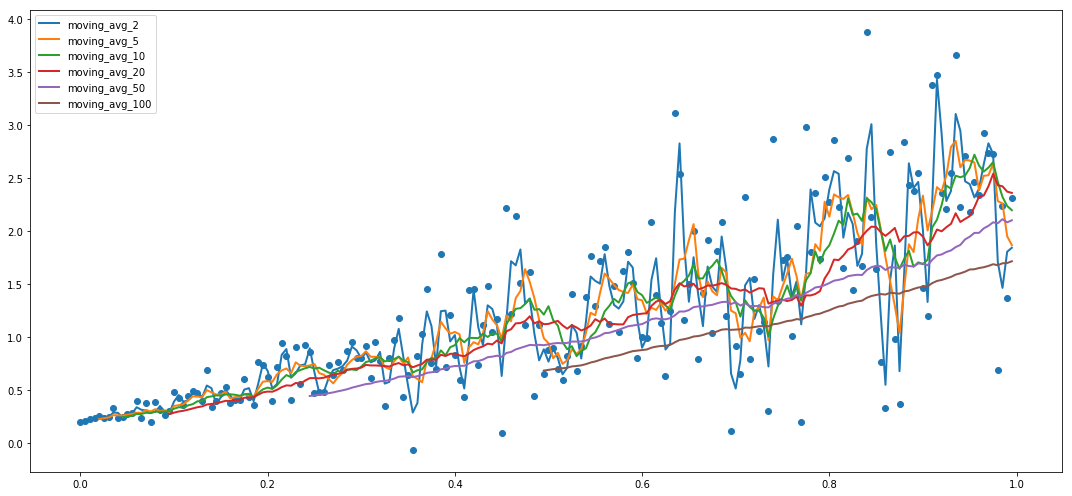

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.scatter(X, y)
for col in df.columns:
    if col.startswith('moving_avg_'):
        ax.plot(X, df[col], lw=2, label=col)
plt.legend()
plt.tight_layout()

In [55]:
mdata

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550
2018-12-03 20:00:00,3371.9,3390.0,3353.0,3390.0,359.691724
2018-12-03 21:00:00,3387.0,3421.5,3381.8,3420.1,369.278113
2018-12-03 22:00:00,3420.6,3428.3,3387.7,3394.9,130.852100
2018-12-03 23:00:00,3396.3,3410.9,3376.0,3383.7,173.571187


In [57]:
for window in (1, 3, 5, 10, 30, 60, 120, 180, 240, 300, 480, 600):
    mdata['ma{}'.format(window)] = mdata['close'].rolling(window).mean()

In [58]:
mdata

,open,high,low,close,volume,ma1,ma3,ma5,ma10,ma30,ma60,ma120,ma180,ma240,ma300,ma480,ma600
ts,,,,,,,,,,,,,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300,3387.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013,3375.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973,3384.2,3382.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759,3391.0,3383.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550,3373.3,3382.833333,3382.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 20:00:00,3371.9,3390.0,3353.0,3390.0,359.691724,3390.0,3384.766667,3382.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 21:00:00,3387.0,3421.5,3381.8,3420.1,369.278113,3420.1,3394.466667,3391.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 22:00:00,3420.6,3428.3,3387.7,3394.9,130.852100,3394.9,3401.666667,3393.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03 23:00:00,3396.3,3410.9,3376.0,3383.7,173.571187,3383.7,3399.566667,3392.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
ma_cols = [x for x in mdata.columns if x.startswith('ma')]

In [60]:
ma_cols

['ma1',
 'ma3',
 'ma5',
 'ma10',
 'ma30',
 'ma60',
 'ma120',
 'ma180',
 'ma240',
 'ma300',
 'ma480',
 'ma600']

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

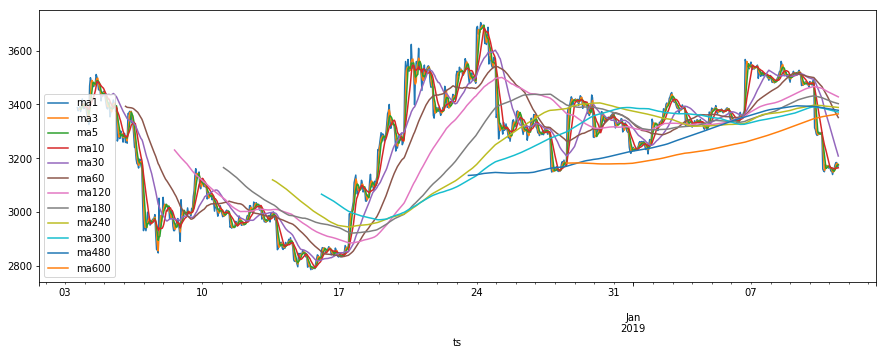

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
for col in ma_cols:
    mdata[col].plot(ax=ax, label=col)
plt.legend()
plt.tight_layout

In [64]:
seriea = mdata['ma1'] >= mdata['ma10']
serieb = mdata['ma1'] < mdata['ma10']

In [67]:
seriea, serieb

(ts
 2018-12-03 15:00:00    False
 2018-12-03 16:00:00    False
 2018-12-03 17:00:00    False
 2018-12-03 18:00:00    False
 2018-12-03 19:00:00    False
 2018-12-03 20:00:00    False
 2018-12-03 21:00:00    False
 2018-12-03 22:00:00    False
 2018-12-03 23:00:00    False
 2018-12-04 00:00:00     True
 2018-12-04 01:00:00     True
 2018-12-04 02:00:00    False
 2018-12-04 03:00:00    False
 2018-12-04 04:00:00    False
 2018-12-04 05:00:00    False
 2018-12-04 06:00:00     True
 2018-12-04 07:00:00     True
 2018-12-04 08:00:00     True
 2018-12-04 09:00:00     True
 2018-12-04 10:00:00     True
 2018-12-04 11:00:00     True
 2018-12-04 12:00:00     True
 2018-12-04 13:00:00     True
 2018-12-04 14:00:00     True
 2018-12-04 15:00:00     True
 2018-12-04 16:00:00    False
 2018-12-04 17:00:00    False
 2018-12-04 18:00:00    False
 2018-12-04 19:00:00    False
 2018-12-04 20:00:00    False
                        ...  
 2019-01-10 06:00:00    False
 2019-01-10 07:00:00    False
 2019-

In [68]:
df = pd.DataFrame({'b':serieb, 'nb':serieb.shift(-1)}, index=serieb.index)

In [69]:
df

,b,nb
ts,,
2018-12-03 15:00:00,False,False
2018-12-03 16:00:00,False,False
2018-12-03 17:00:00,False,False
2018-12-03 18:00:00,False,False
2018-12-03 19:00:00,False,False
2018-12-03 20:00:00,False,False
2018-12-03 21:00:00,False,False
2018-12-03 22:00:00,False,False
2018-12-03 23:00:00,False,False


In [ ]:
# Ejercicio

In [72]:
df_2 = df['b'] != df['nb']
df_2

In [75]:
df_3 = pd.DataFrame({'dif': df['b'] != df['nb']})
df_3

,dif
ts,
2018-12-03 15:00:00,False
2018-12-03 16:00:00,False
2018-12-03 17:00:00,False
2018-12-03 18:00:00,False
2018-12-03 19:00:00,False
2018-12-03 20:00:00,False
2018-12-03 21:00:00,False
2018-12-03 22:00:00,False
2018-12-03 23:00:00,False


In [80]:
df[df['b'] != df['nb']]

,b,nb
ts,,
2018-12-04 01:00:00,False,True
2018-12-04 05:00:00,True,False
2018-12-04 15:00:00,False,True
2018-12-05 10:00:00,True,False
2018-12-05 13:00:00,False,True
2018-12-05 23:00:00,True,False
2018-12-06 01:00:00,False,True
2018-12-06 04:00:00,True,False
2018-12-06 11:00:00,False,True


In [91]:
df[(df['b'] == True) & (df['nb'] == False)]

,b,nb
ts,,
2018-12-04 05:00:00,True,False
2018-12-05 10:00:00,True,False
2018-12-05 23:00:00,True,False
2018-12-06 04:00:00,True,False
2018-12-07 08:00:00,True,False
2018-12-07 18:00:00,True,False
2018-12-07 20:00:00,True,False
2018-12-08 06:00:00,True,False
2018-12-08 17:00:00,True,False


In [86]:
# Resolución

In [87]:
buy = df.apply(lambda x: not x[0] and x[1], axis=1)
buy_points = buy[buy == True]

sell = df.apply(lambda x: x[0] and not x[1], axis=1)
sell_points = sell[sell == True]

In [88]:
buy[buy == True]

ts
2018-12-04 01:00:00    True
2018-12-04 15:00:00    True
2018-12-05 13:00:00    True
2018-12-06 01:00:00    True
2018-12-06 11:00:00    True
2018-12-07 14:00:00    True
2018-12-07 19:00:00    True
2018-12-08 05:00:00    True
2018-12-08 07:00:00    True
2018-12-08 18:00:00    True
2018-12-09 06:00:00    True
2018-12-09 08:00:00    True
2018-12-09 20:00:00    True
2018-12-10 22:00:00    True
2018-12-11 06:00:00    True
2018-12-11 08:00:00    True
2018-12-11 23:00:00    True
2018-12-12 21:00:00    True
2018-12-12 23:00:00    True
2018-12-13 10:00:00    True
2018-12-13 16:00:00    True
2018-12-14 12:00:00    True
2018-12-14 22:00:00    True
2018-12-15 05:00:00    True
2018-12-16 07:00:00    True
2018-12-16 13:00:00    True
2018-12-16 20:00:00    True
2018-12-17 00:00:00    True
2018-12-18 00:00:00    True
2018-12-18 04:00:00    True
                       ... 
2018-12-25 12:00:00    True
2018-12-26 05:00:00    True
2018-12-27 00:00:00    True
2018-12-27 14:00:00    True
2018-12-28 05:00:

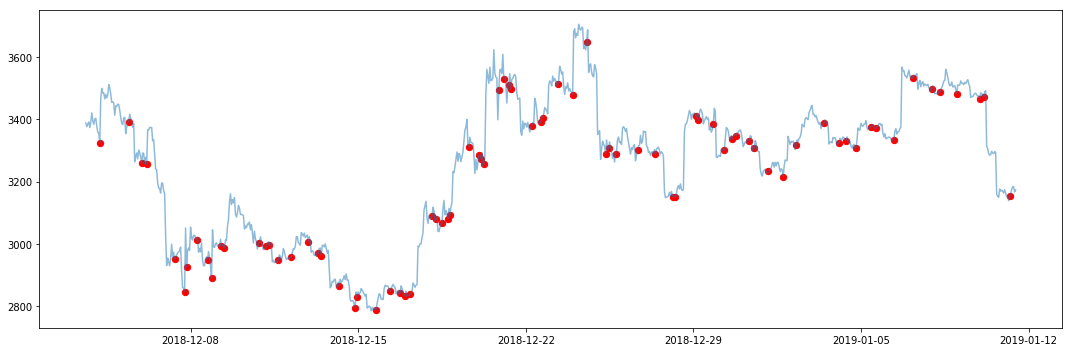

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(mdata.index, mdata['close'], alpha=.5)
ax.scatter(sell_points.index, mdata['close'][sell_points.index], c='r', s=40)
plt.tight_layout()